--- Q3(a) Convolution Matrix ---
[[10. -1. 20.  6.]
 [ 2. -2.  5. 13.]
 [ 3. -6.  8. 10.]
 [22.  0. 10. 21.]]

--- Q3(b) Max Pool Matrix ---
[[7. 7. 7. 7.]
 [7. 7. 8. 8.]
 [7. 7. 8. 8.]
 [7. 7. 8. 8.]]


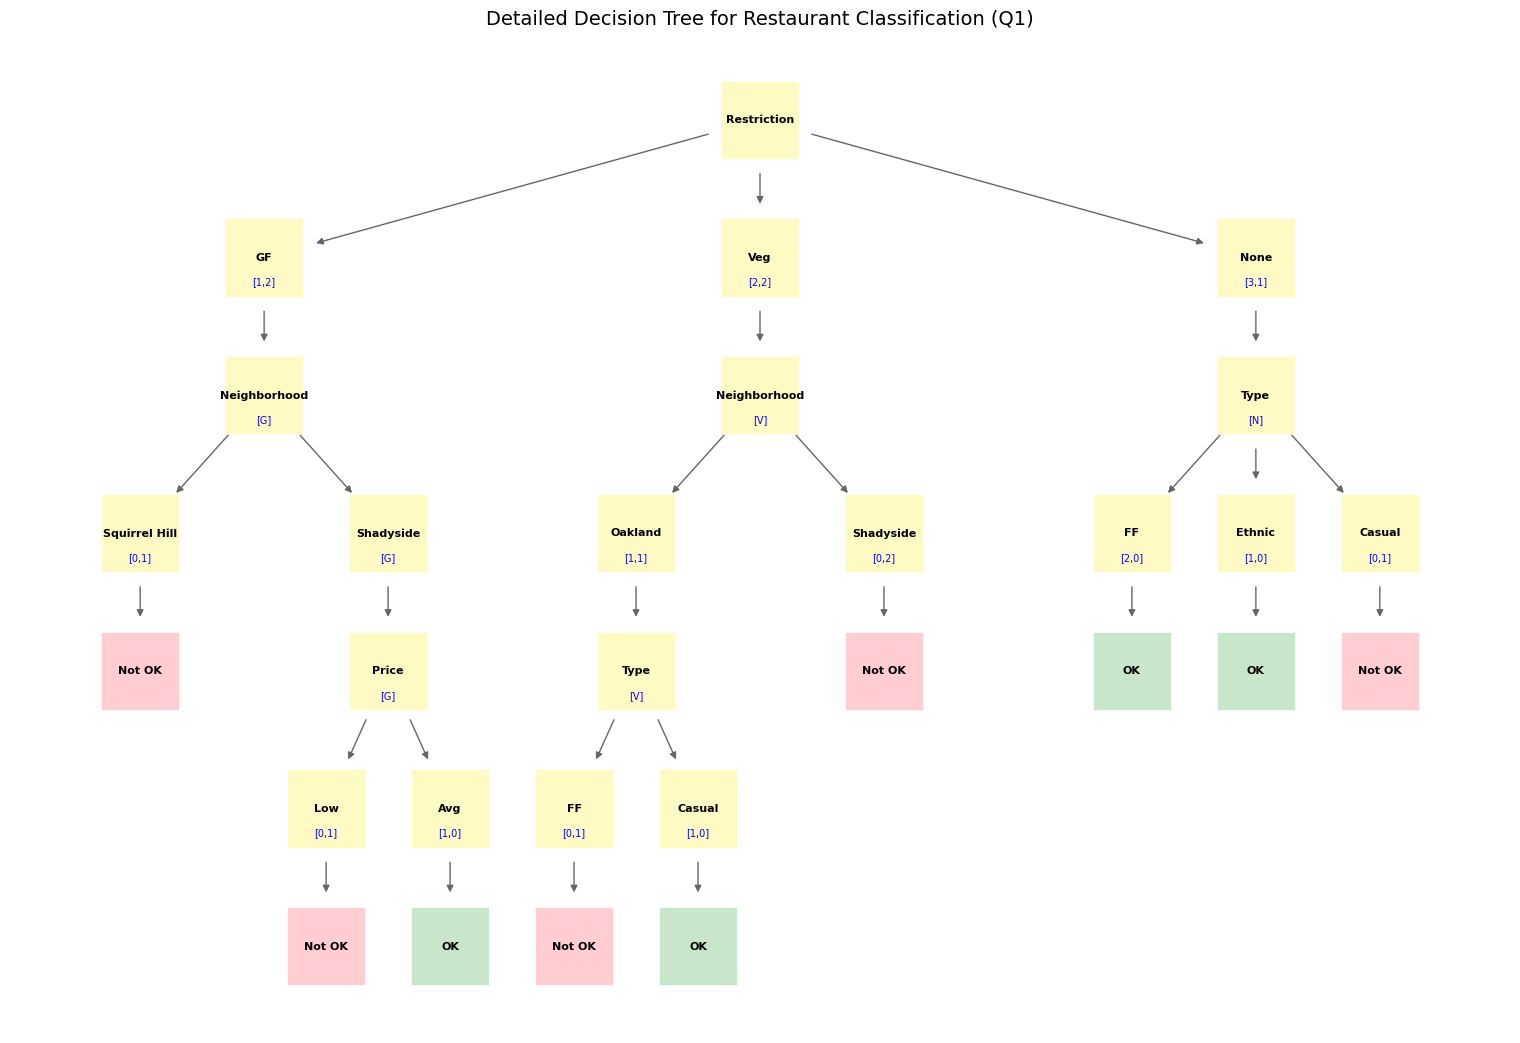

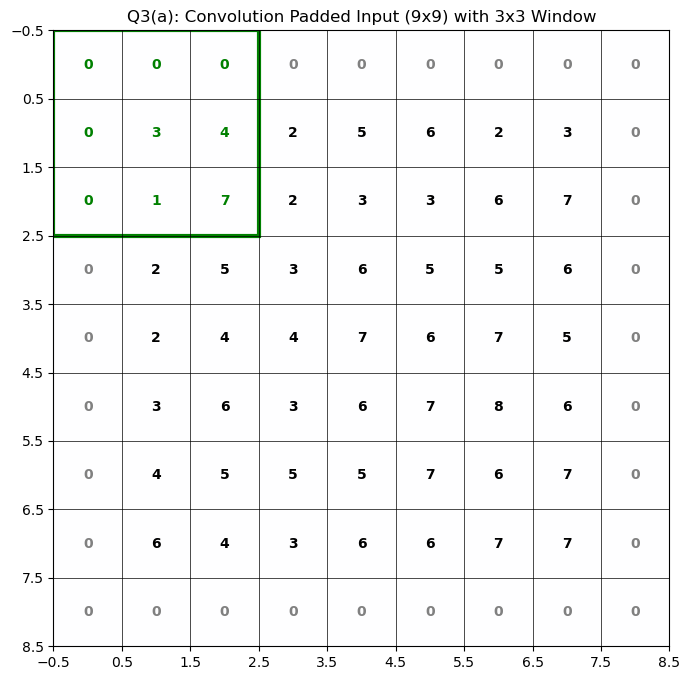

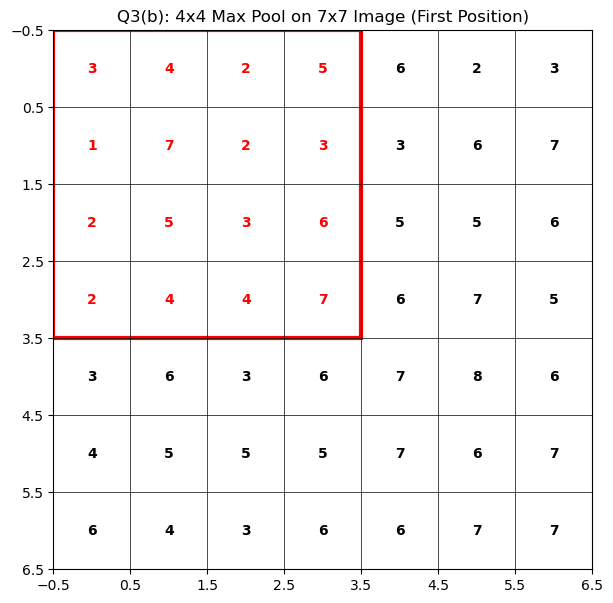

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def get_assignment_data():
    """
    Defines the image grid and filter logic. 
    Image data is based on the consensus interpretation of the 7x7 grid.
    """
    image = np.array([
        [3, 4, 2, 5, 6, 2, 3],
        [1, 7, 2, 3, 3, 6, 7],
        [2, 5, 3, 6, 5, 5, 6],
        [2, 4, 4, 7, 6, 7, 5], 
        [3, 6, 3, 6, 7, 8, 6],
        [4, 5, 5, 5, 7, 6, 7],
        [6, 4, 3, 6, 6, 7, 7]
    ])
    kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ])
    return image, kernel

def draw_decision_tree():
    """
    Generates a high-fidelity Decision Tree diagram mirroring the peer's layout.
    Includes classification counts (Positive/Negative) in nodes.
    """
    plt.figure(figsize=(15, 10))
    G = nx.DiGraph()
    
    edges = [
        ("Restriction", "None (3,1)"), 
        ("Restriction", "Veg (2,2)"), 
        ("Restriction", "GF (1,2)"),
        ("None (3,1)", "Type (N)"), 
        ("Type (N)", "FF (2,0)"), ("Type (N)", "Ethnic (1,0)"), ("Type (N)", "Casual (0,1)"),
        ("FF (2,0)", "OK_1"), ("Ethnic (1,0)", "OK_2"), ("Casual (0,1)", "Not OK_1"),
        ("Veg (2,2)", "Neighborhood (V)"),
        ("Neighborhood (V)", "Oakland (1,1)"), ("Neighborhood (V)", "Shadyside (0,2)"),
        ("Oakland (1,1)", "Type (V)"), ("Type (V)", "FF (0,1)"), ("Type (V)", "Casual (1,0)"),
        ("Shadyside (0,2)", "Not OK_2"),
        ("FF (0,1)", "Not OK_3"), ("Casual (1,0)", "OK_3"),
        ("GF (1,2)", "Neighborhood (G)"),
        ("Neighborhood (G)", "Squirrel Hill (0,1)"), ("Neighborhood (G)", "Shadyside (G)"),
        ("Shadyside (G)", "Price (G)"), 
        ("Price (G)", "Low (0,1)"), ("Price (G)", "Avg (1,0)"),
        ("Squirrel Hill (0,1)", "Not OK_4"), ("Low (0,1)", "Not OK_5"), ("Avg (1,0)", "OK_4")
    ]
    G.add_edges_from(edges)
    
    pos = {
        "Restriction": (0, 10),
        "None (3,1)": (4, 8), "Veg (2,2)": (0, 8), "GF (1,2)": (-4, 8),
        "Type (N)": (4, 6), "FF (2,0)": (3, 4), "Ethnic (1,0)": (4, 4), "Casual (0,1)": (5, 4),
        "OK_1": (3, 2), "OK_2": (4, 2), "Not OK_1": (5, 2),
        "Neighborhood (V)": (0, 6), "Oakland (1,1)": (-1, 4), "Shadyside (0,2)": (1, 4),
        "Type (V)": (-1, 2), "FF (0,1)": (-1.5, 0), "Casual (1,0)": (-0.5, 0),
        "Not OK_2": (1, 2), "Not OK_3": (-1.5, -2), "OK_3": (-0.5, -2),
        "Neighborhood (G)": (-4, 6), "Squirrel Hill (0,1)": (-5, 4), "Shadyside (G)": (-3, 4),
        "Price (G)": (-3, 2), "Low (0,1)": (-3.5, 0), "Avg (1,0)": (-2.5, 0),
        "Not OK_4": (-5, 2), "Not OK_5": (-3.5, -2), "OK_4": (-2.5, -2)
    }

    labels = {}
    for node in G.nodes():
        if "_" in node: labels[node] = node.split("_")[0]
        elif "(" in node and node != "Restriction": labels[node] = node.split("(")[0].strip()
        else: labels[node] = node

    node_colors = ["#ffcdd2" if "Not OK" in n else "#c8e6c9" if "OK" in n else "#fff9c4" for n in G.nodes()]
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, 
            node_color=node_colors, font_size=8, font_weight="bold", 
            arrows=True, edge_color="#666666", node_shape="s")
    
    for node, (x, y) in pos.items():
        if "(" in node and "Restriction" not in node:
            count = node.split("(")[1].replace(")", "")
            plt.text(x, y-0.4, f"[{count}]", fontsize=7, ha='center', color='blue')

    plt.title("Detailed Decision Tree for Restaurant Classification (Q1)", fontsize=14)
    plt.show()

def draw_convolution_steps():
    """Visualizes the 3x3 convolution on the padded grid (Q3a)."""
    image, kernel = get_assignment_data()
    padded = np.pad(image, 1, mode='constant')
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(np.zeros((9, 9)), cmap='Blues', alpha=0.1)
    
    # Highlight first stride position
    rect = plt.Rectangle((-.5, -.5), 3, 3, linewidth=3, edgecolor='green', facecolor='none', label='Stride 1 (0,0)')
    ax.add_patch(rect)
    
    for i in range(9):
        for j in range(9):
            val = padded[i, j]
            color = 'green' if i < 3 and j < 3 else 'gray' if (i == 0 or i == 8 or j == 0 or j == 8) else 'black'
            ax.text(j, i, str(val), va='center', ha='center', fontweight='bold', color=color)
            
    ax.set_xticks(np.arange(-.5, 9, 1)); ax.set_yticks(np.arange(-.5, 9, 1))
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title("Q3(a): Convolution Padded Input (9x9) with 3x3 Window", fontsize=12)
    plt.show()

def draw_max_pool_visual():
    """Visualizes the 4x4 Max Pooling on the original image (Q3b)."""
    image, _ = get_assignment_data()
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(np.zeros((7, 7)), cmap='Greys', alpha=0.1)
    
    # Highlight first 4x4 window
    rect = plt.Rectangle((-.5, -.5), 4, 4, linewidth=3, edgecolor='red', facecolor='none', label='4x4 Window')
    ax.add_patch(rect)
    
    for i in range(7):
        for j in range(7):
            val = image[i, j]
            color = 'red' if i < 4 and j < 4 else 'black'
            ax.text(j, i, str(val), va='center', ha='center', fontweight='bold', color=color)
            
    ax.set_xticks(np.arange(-.5, 7, 1)); ax.set_yticks(np.arange(-.5, 7, 1))
    ax.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title("Q3(b): 4x4 Max Pool on 7x7 Image (First Position)", fontsize=12)
    plt.show()

def calculate_cnn_outputs():
    """Performs the Convolution and Max Pooling operations on the 7x7 grid."""
    image, kernel = get_assignment_data()
    padded = np.pad(image, 1, mode='constant')
    conv_out = np.zeros((4, 4))
    for y in range(4):
        for x in range(4):
            r, c = y*2, x*2
            conv_out[y, x] = np.sum(padded[r:r+3, c:c+3] * kernel)
            
    pool_out = np.zeros((4, 4))
    for y in range(4):
        for x in range(4):
            pool_out[y, x] = np.max(image[y:y+4, x:x+4])
            
    print("--- Q3(a) Convolution Matrix ---")
    print(conv_out)
    print("\n--- Q3(b) Max Pool Matrix ---")
    print(pool_out)

if __name__ == "__main__":
    calculate_cnn_outputs()
    draw_decision_tree()
    draw_convolution_steps()
    draw_max_pool_visual()